In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
training_images=training_images.reshape(training_images.shape[0], 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images=test_images/255.0

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 50

#input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols,1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate = 1-0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=1-0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(rate=1-0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=1-0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)  

In [85]:
history = model.fit(training_images, training_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 54s 896us/step - loss: 0.2805 - acc: 0.8969 - val_loss: 0.2531 - val_acc: 0.9059
Epoch 2/50
60000/60000 [==============================] - 63s 1ms/step - loss: 0.2649 - acc: 0.9026 - val_loss: 0.2467 - val_acc: 0.9059
Epoch 3/50
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2588 - acc: 0.9042 - val_loss: 0.2425 - val_acc: 0.9114
Epoch 4/50
60000/60000 [==============================] - 70s 1ms/step - loss: 0.2521 - acc: 0.9067 - val_loss: 0.2404 - val_acc: 0.9107
Epoch 5/50
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2482 - acc: 0.9082 - val_loss: 0.2387 - val_acc: 0.9114
Epoch 6/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2478 - acc: 0.9072 - val_loss: 0.2375 - val_acc: 0.9124
Epoch 7/50
60000/60000 [==============================] - 68s 1ms/step - loss: 0.2448 - acc: 0.9090 - val_loss: 0.2333 - val_a

(28, 28)
[[0.19670226 0.05504664 0.08562452 0.09580011 0.1547251  0.05756108
  0.08346409 0.05617536 0.08458304 0.13031772]]
0
[9 0 0 ... 3 0 5]


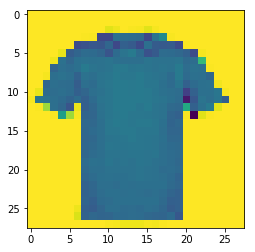

In [5]:
example_img = cv2.imread("./images/blue.png")
example_img = cv2.cvtColor(example_img, cv2.COLOR_BGR2GRAY)
example_img = cv2.resize(example_img, (28,28))
plt.imshow(example_img)


print(example_img.shape)
example_img = example_img/255.0

example_img = example_img.reshape(1,28,28,1)
ans = model.predict(example_img)
print(ans)

mx_chance = max(ans[0])
hash = -1
for i in range(0, len(ans[0])):
    if(mx_chance == ans[0][i]):
        hash = i
print(hash)
print(training_labels)    

In [6]:
print(mnist)

<module 'tensorflow._api.v1.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.5/dist-packages/tensorflow/_api/v1/keras/datasets/fashion_mnist/__init__.py'>


In [7]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
0
3
2
7
5
1
6
4
8


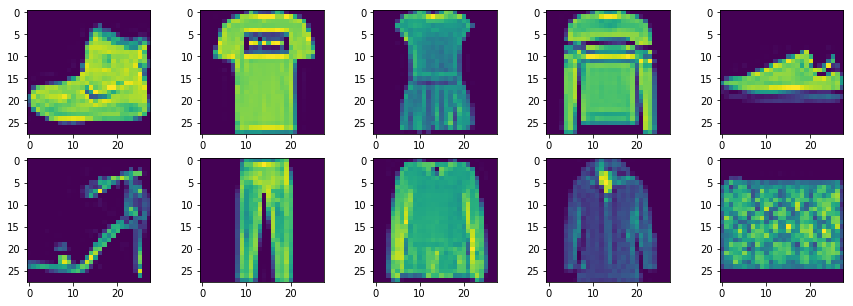

In [8]:
fig=plt.figure(figsize=(15, 5))
columns = 5
rows = 2
flag = []
cnt = 1
for i in range(0,10):
    flag.append(False)
for i in range(len(training_images)):
    alltrue = True
    for j in range(0, len(flag)):
        if(flag[j]==False):
            alltrue = False
    if(alltrue == True):
        break
    if(flag[training_labels[i]]==False):
        flag[training_labels[i]]=True
        print(training_labels[i])
        fig.add_subplot(rows, columns, cnt)
        cnt=cnt+1
        plt.imshow(training_images[i])
plt.show()
        

In [9]:
num_to_items={0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

In [10]:
print(num_to_items[hash])

T-shirt/top


Ankle boot


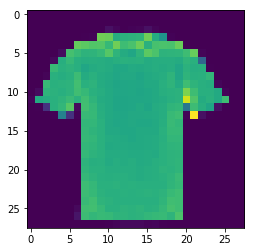

In [14]:
def predictFashionItem(fashion_img):
    
    fashion_img = cv2.cvtColor(fashion_img, cv2.COLOR_BGR2GRAY)
    fashion_img = cv2.resize(fashion_img, (28,28))
    plt.imshow(fashion_img)
    fashion_img = fashion_img.reshape(1,28,28,1)
    fashion_img = fashion_img/255.0
    
    
    predict_array = model.predict(fashion_img)

    mx_chance = max(predict_array[0])
    hash = -1
    for i in range(0, len(predict_array[0])):
        if(mx_chance == predict_array[0][i]):
            hash = i
            
    return num_to_items[hash]

example_img = cv2.imread("./images/blue.png")
example_img = 255-example_img
print(predictFashionItem(example_img))
    

Ankle boot


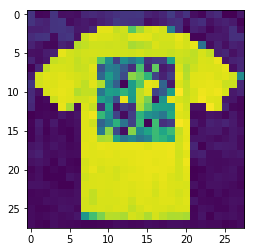

In [15]:
example_img2 = cv2.imread("./images/images (3).jpeg")
print(predictFashionItem(example_img2))

T-shirt/top


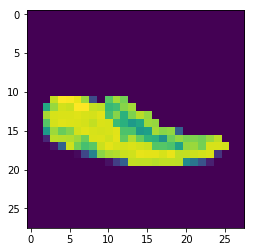

In [16]:
example_img2 = cv2.imread("./images/shoe.jpg")
example_img2 = 255-example_img2
print(predictFashionItem(example_img2))

In [12]:
def predictFashionTrainItem(fashion_img):

    #fashion_img = cv2.cvtColor(fashion_img, cv2.COLOR_BGR2GRAY)
    #fashion_img = cv2.resize(fashion_img, (28,28))
    plt.imshow(fashion_img)
    fashion_img = fashion_img.reshape(1,28,28,1)
    fashion_img = fashion_img/255.0
    
    
    predict_array = model.predict(fashion_img)

    mx_chance = max(predict_array[0])
    hash = -1
    for i in range(0, len(predict_array[0])):
        if(mx_chance == predict_array[0][i]):
            hash = i
            
    return num_to_items[hash]

Ankle boot


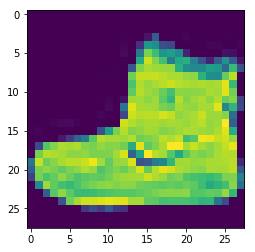

In [129]:
print(predictFashionTrainItem(training_images[0]))

Pullover


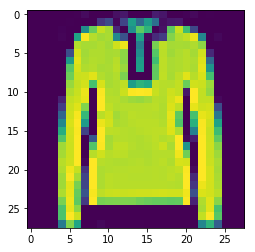

In [133]:
print(predictFashionTrainItem(training_images[1100]))

In [19]:
import pickle

In [138]:
pickle_out = open("fashion_model.pickle","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [20]:
pickle_in = open("fashion_model.pickle","rb")
model = pickle.load(pickle_in)

Instructions for updating:
Use tf.cast instead.


Sandal


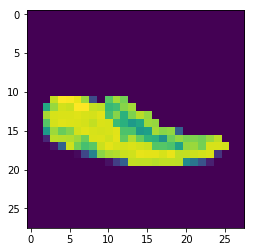

In [21]:
example_img2 = cv2.imread("./images/shoe.jpg")
example_img2 = 255-example_img2
print(predictFashionItem(example_img2))

Dress


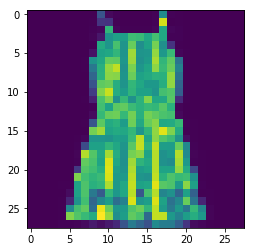

In [26]:
example_img2 = cv2.imread("./images/images (1).jpeg")
example_img2 = 255-example_img2
print(predictFashionItem(example_img2))

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization


batch_size = 256
num_classes = 10
epochs = 50

#input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols,1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate = 1-0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=1-0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(rate=1-0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=1-0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)  

In [9]:
successive_outputs = [layer.output for layer in model.layers[1:2]]

In [2]:
successive_outputs

NameError: name 'successive_outputs' is not defined